In [1]:
from pylab import *
from classy import *

Version:  0.0.68


In [2]:
images=image.load_images('images/hawkins_bitmaps subset/clean')

Expecting a folder of target-named folders.  Found  images/hawkins_bitmaps subset/clean/Icon
[cat]: 20 files found
[bed]: 6 files found
[dog]: 20 files found
[helicopter]: 12 files found
[bus]: 5 files found
[mug]: 18 files found
[wineglass]: 5 files found


In [3]:
data=image.images_to_vectors(images)

86 vectors of length 1024
Feature names: 'p0', 'p1', 'p2', 'p3', 'p4'  , ... ,  'p1019', 'p1020', 'p1021', 'p1022', 'p1023'  (1024 features)
Target values given.
Target names: 'cat', 'bed', 'dog', 'helicopter', 'bus', 'mug', 'wineglass'
Mean:  [252.03488372 252.03488372 252.03488372 ... 255.         255.
 255.        ]
Median:  [255. 255. 255. ... 255. 255. 255.]
Stddev:  [27.33702136 27.33702136 27.33702136 ...  0.          0.
  0.        ]


In [4]:
data_train,data_test=split(data)

Original vector shape:  (86, 1024)
Train vector shape:  (64, 1024)
Test vector shape:  (22, 1024)


In [5]:
C=BackProp([
    Input(shape=(1024,)),  # number of inputs
    Dense(features=15),  # hidden
    ReLU(),
    Dense(features=15),  # hidden
    ReLU(),
    Dense(features=7),  # output = number of categories
    ],learning_rate=0.001
)


                             NeuralNetwork Summary                              
┏━━━━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ path     ┃ module        ┃ inputs          ┃ outputs       ┃ params          ┃
┡━━━━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│          │ NeuralNetwork │ float32[1,1024] │ float32[1,7]  │                 │
├──────────┼───────────────┼─────────────────┼───────────────┼─────────────────┤
│ layers_0 │ Dense         │ float32[1,1024] │ float32[1,15] │ bias:           │
│          │               │                 │               │ float32[15]     │
│          │               │                 │               │ kernel:         │
│          │               │                 │               │ float32[1024,1… │
│          │               │                 │               │                 │
│          │               │                 │               │ 15,375 (61.5    │
│          │               

100%|█████████████████████████████████████| 1000/1000 [00:00<00:00, 1729.36it/s]


On train:  0.25
On test:  0.1818181872367859


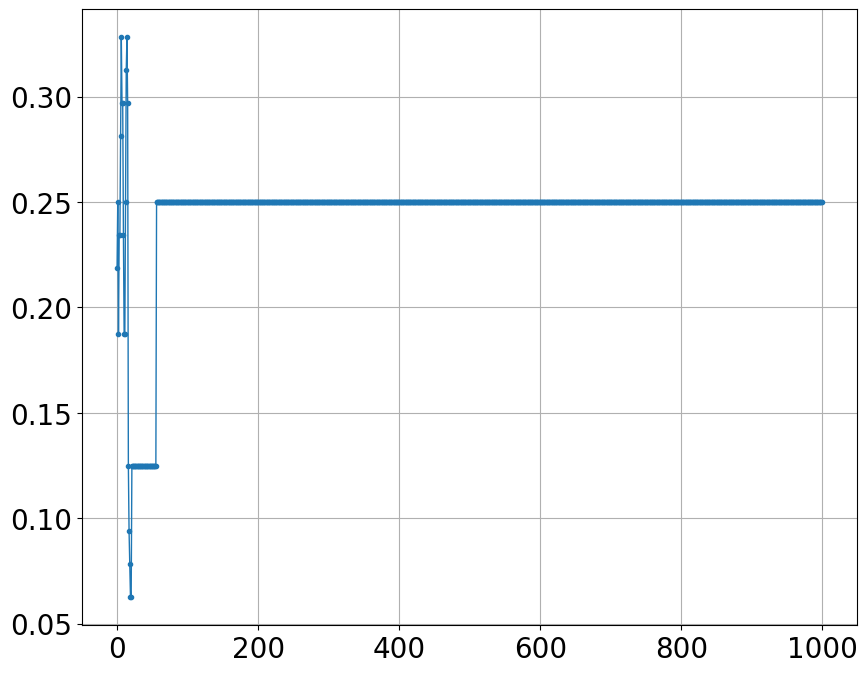

In [6]:
C.fit(data_train.vectors,data_train.targets,epochs=1000)
plot(C.training_accuracies,'.-',lw=1)

print("On train: ",C.percent_correct(data_train.vectors,data_train.targets))
print("On test: ",C.percent_correct(data_test.vectors,data_test.targets))